Probability of roll a 6-side dice.
The second chart demonstates that when you roll the dice 1000 times the probability of showing up each side is equal and it is 1/6 ~ 16.6%

In [3]:
import numpy as np
import matplotlib.pyplot as plt

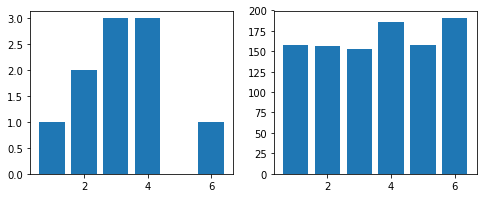

In [4]:

few_roll = np.random.randint(1,7, size=10)
many_roll = np.random.randint(1,7, size=1000)
few_counts = np.histogram(few_roll,bins = np.arange(.5,7.5))[0]
many_counts = np.histogram(many_roll,bins = np.arange(.5,7.5))[0]

fig, (ax1,ax2) = plt.subplots(1,2,figsize=(8,3))
ax1.bar(np.arange(1,7), few_counts)
ax2.bar(np.arange(1,7), many_counts)
plt.show()

Distribution of event of flip a coin many times: 5, 10, 20 , 40 and 80 times

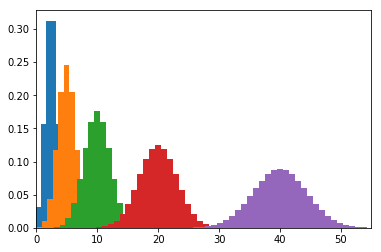

In [6]:
import scipy.stats as ss
b = ss.distributions.binom
for flips in [5,10,20,40,80]:
    #binormial with .5 is result of many coin flips
    success = np.arange(flips)
    our_distribution = b.pmf(success, flips, .5)
    plt.hist(success, flips, weights = our_distribution)
plt.xlim(0, 55)
plt.show()

Smoothier the distribution in the bell sharp curves ( normal distribution)

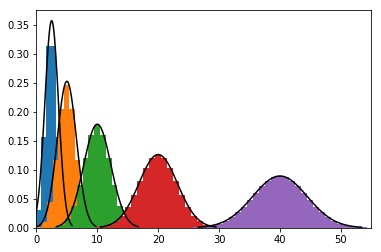

In [8]:
b = ss.distributions.binom
n = ss.distributions.norm
for flips in [5,10,20,40,80]:
    # binormial coin flips
    success = np.arange(flips)
    our_distribution = b.pmf(success, flips, .5)
    plt.hist(success, flips, weights = our_distribution)
    # normal approximation to that binormial
    # we have to set the mean and standard deviation
    mu = flips * .5
    std_dev = np.sqrt( mu * (1 - .5))
    # we have to set up both the x and y points for the normal
    # we get the ys from the distribution 
    norm_x = np.linspace(mu - 3*std_dev, mu + 3*std_dev, 100)
    norm_y = n.pdf(norm_x, mu, std_dev)
    plt.plot(norm_x, norm_y, 'k')
plt.xlim(0,55)
plt.show()



Try en event many times will likely get the result close with expected one .
For example: A game to flip a dice , get $1 for even numbers faced and lose -$.5 for odd numbers
we can get an expected outcomes based on the math of its probabilites

In [12]:
payoff = np.array([1,-.5])
# get $1 or lost -$.5
probs = np.array([.5,.5])
# assume probabilies of them are equal (50%)
print(np.dot(payoff,probs))

0.25


$.25 is an expected money we could get from the game 

In [10]:
def is_even(n):
    return n % 2 == 0
winnings = 0.0
for flip_count in range(10000):
    flip_dice = np.random.randint(1,7)
    winnings += 1 if is_even(flip_dice) else -.5
print(winnings)    

2563.0


If we try the game 10000 times, we like get to amount of ~ .25 * 10000 = $2500

in summary, the discrete uniform distribution looks like: f(x) = 1/k where k: number of possible events (like 6 for dice and 2 for a coin flip)
the equation for the normal distribution: f(x) = (1/vm)*(e power -(1/2)*(((x - mean)/std) power 2))